In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import scipy.interpolate as si
import matplotlib as mpl
import glob
from astropy.time import Time
np.set_printoptions(precision=10)
import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = -4
    ymax = 40
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        lbf_nf[lbf_nf==inf]=ymax
        lbf_nf[lbf_nf==-inf]=ymin
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        lbf_af[lbf_af==inf]=ymax
        lbf_af[lbf_af==-inf]=ymin
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=2,prop={'size': 10})

## Data IONFR

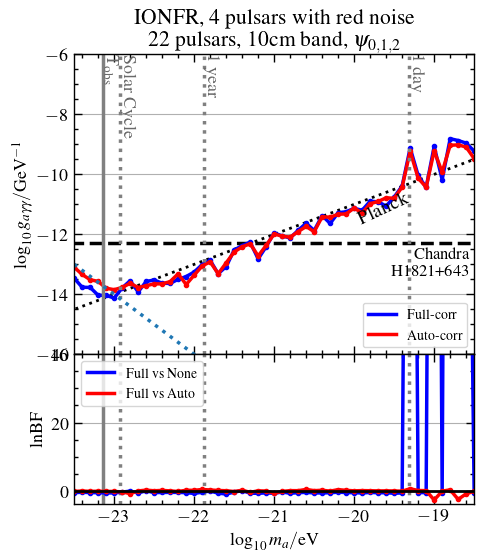

In [2]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-1.351, -1.694, -1.968, -2.126, -2.451, -2.601, -2.627, -2.588,
       -2.828, -2.868, -2.906, -3.007, -3.03 , -2.872, -3.329, -3.116,
       -2.912, -2.87 , -3.369, -3.109, -2.842, -2.774, -2.768, -3.278,
       -3.025, -2.741, -2.919, -3.051, -2.963, -2.894, -3.168, -2.77 ,
       -2.886, -2.886, -2.975, -2.878, -3.148, -2.935, -2.96 , -2.939,
       -3.053, -2.776, -1.686, -2.683, -3.085, -1.974, -2.779, -1.988,
       -2.072, -2.246, -2.732])



ul_full = np.array([-1.718, -2.12 , -2.226, -2.587, -2.69 , -2.881, -2.643, -2.501,
       -2.976, -2.727, -2.779, -2.986, -3.092, -3.055, -3.063, -3.013,
       -2.864, -2.823, -3.368, -3.231, -2.78 , -2.732, -2.718, -3.373,
       -3.067, -2.707, -2.91 , -3.074, -2.924, -2.785, -3.129, -2.733,
       -3.092, -2.836, -2.903, -2.889, -3.054, -2.85 , -2.973, -3.215,
       -3.014, -2.743, -1.581, -2.594, -3.093, -1.826, -3.032, -1.767,
       -1.929, -2.115, -2.482])


make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("IONFR, 4 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.212, -0.082, -0.192, -0.151, -0.206, -0.22 , -0.352, -0.859,
       -0.063,  0.169, -0.017,  0.092, -0.054, -0.229,  0.136,  0.111,
        0.36 ,  0.218,  0.069, -0.006, -0.234,  0.141, -0.478, -0.03 ,
       -0.098, -0.709, -0.209,  0.024,  0.009,  0.376,  0.014,  0.139,
       -0.121,  0.311,  0.111, -0.034,  0.029, -0.004, -0.056, -0.044,
       -0.067, -0.137,  0.582,  0.061,  0.011, -2.718, -0.136,  0.258,
       -2.532, -0.912, -0.149])

lbf_nf = np.array([-0.575, -0.457, -0.555, -0.583, -0.638, -0.668, -0.398, -0.132,
       -0.649, -0.028, -0.565, -0.517, -0.492, -0.501, -0.577, -0.802,
       -0.438, -0.101, -0.713, -0.971, -0.405,  0.014, -0.722, -0.77 ,
       -0.631, -0.765, -0.374, -0.75 , -0.574, -0.489, -0.653, -0.658, -0.593, -0.437, -0.534, -0.594,
       -0.664, -0.508, -0.595, -0.595, -0.756, -0.647,inf,-0.55808, -0.552,inf, -0.592,inf,inf,inf,-0.697420])
lbf_nf[[42,45,47,48,49]] = np.array([14502.658, 14578.681, 14671.908, 14536.677, 14389.249])-14197.033215000001
make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)



In [3]:
crit = np.where(lbf_nf>20)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
for c in crit:
    print(c,l10ma[c])


42 -19.3
45 -19.0
47 -18.8
48 -18.7
49 -18.6


## Data NO IONO

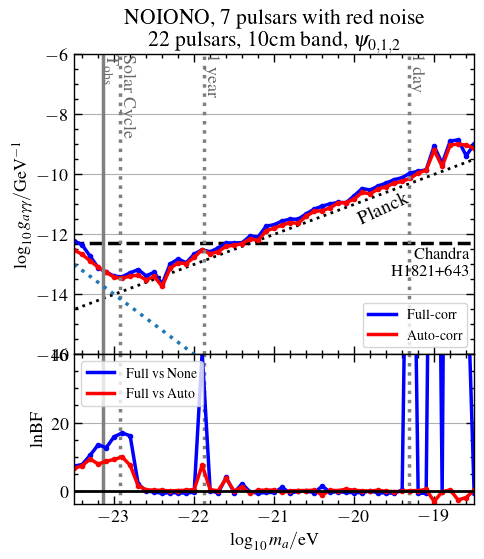

In [3]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5
ul_auto = np.array([-0.779, -1.023, -1.346, -1.646, -1.923, -2.182, -2.324, -2.343,
       -2.422, -2.678, -2.661, -3.088, -2.586, -2.507, -2.63 , -2.523,
       -2.369, -2.604, -2.634, -2.552, -2.621, -2.665, -2.61 , -2.759,
       -2.537, -2.551, -2.546, -2.567, -2.688, -2.549, -2.492, -2.565,
       -2.573, -2.506, -2.597, -2.579, -2.46 , -2.606, -2.541, -2.569,
       -2.553, -2.588, -2.587, -2.514, -2.511, -1.956, -2.594, -1.979,
       -2.044, -2.181, -2.388])


ul_full = np.array([-0.47 , -0.708, -1.188, -1.668, -1.909, -2.154, -2.27 , -2.239,
       -2.232, -2.538, -2.522, -3.014, -2.443, -2.378, -2.602, -2.418,
       -2.368, -2.539, -2.51 , -2.448, -2.542, -2.634, -2.51 , -2.642,
       -2.383, -2.434, -2.411, -2.45 , -2.55 , -2.474, -2.417, -2.415,
       -2.44 , -2.493, -2.597, -2.472, -2.328, -2.478, -2.445, -2.447,
       -2.434, -2.466, -2.41 , -2.454, -2.506, -1.81 , -2.496, -1.849,
       -1.905, -2.536, -2.252])




make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("NOIONO, 7 pulsars with red noise\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        1.446,  0.282,  0.145,  0.126, -0.06 ,  0.057,  0.12 ,  0.351,
          inf,  0.33 , -0.02 ,  3.617, -0.161,  1.138, -0.788,  0.125,
        0.163,  0.185, -0.501, -0.022,  0.042,  0.055,  0.135, -1.298,
        0.134,  0.048,  0.441,  0.147, -0.023, -0.074,  0.132, -0.165,
       -0.268, -0.179,  0.013,  0.041,  0.369, -3.186, -0.285,  0.23 ,
       -2.716, -1.998,  0.116])
lbf_af[0] = np.log(1.7039) + 6
lbf_af[1] = np.log(3.7891) + 6
lbf_af[2] = np.log(1.3521) + 9
lbf_af[3] = np.log(6.2321) + 6
lbf_af[4] = np.log(14.0000) + 6
lbf_af[5] = np.log(24.3125) + 6
lbf_af[6] = np.log(49.8125) + 6
lbf_af[7] = np.log(4.2941) + 6
lbf_af[16] = np.log(0.2215) + 9

lbf_nf= np.array([   inf,    inf,    inf,    inf,    inf,    inf,    inf,    inf,
        1.987, -0.125, -0.366, -0.766, -0.535, -0.66 , -0.657, -0.455,
          inf,  0.033, -0.65 ,    inf, -0.53 ,  2.048, -0.404, -0.731,
       -0.514, -0.514,  0.973, -0.725, -0.154, -0.114, -0.538,  1.319,
       -0.418, -0.315, -0.478, -0.575, -0.558, -0.057, -0.626, -0.629,
       -0.721,  0.177,    inf, -0.739, -0.759,    inf, -0.455,    inf,
          inf,    inf, -0.792])
lbf_nf[0] = np.log(25.0357)+4
lbf_nf[1] = np.log(1.9622)+7
lbf_nf[2] = np.log(4.111)+9
lbf_nf[3] = np.log(11.9415)+11
lbf_nf[4] = np.log(5.0585)+11
lbf_nf[5] = np.log(2.2970)+15
lbf_nf[6] = np.log(0.3549)+18
lbf_nf[7] = np.log(2.9545)+15
lbf_nf[19] = np.log(2.4595)+3
lbf_nf[16] = 40.566785 
lbf_nf[[42,45,47,48,49]] = np.array([14361.25719299, 14423.3956339 , 14522.92954078, 14437.17273122,
       14271.36876378]) -14197.033215000001


make_bf_plot(axes[1],l10ma,lbf_af ,lbf_nf)



In [5]:
crit = np.where(lbf_nf>5)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
for c in crit:
    print(c,l10ma[c])

print(crit)

0 -23.5
1 -23.4
2 -23.3
3 -23.2
4 -23.1
5 -23.0
6 -22.9
7 -22.8
16 -21.9
42 -19.3
45 -19.0
47 -18.8
48 -18.7
49 -18.6
[ 0  1  2  3  4  5  6  7 16 42 45 47 48 49]


# White | seed:20

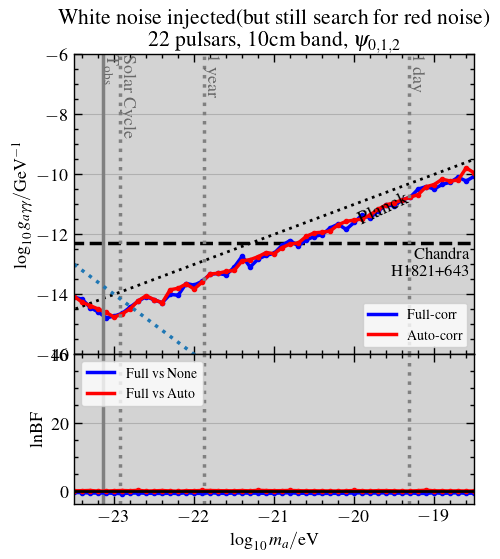

In [6]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.328, -2.618, -2.833, -3.044, -3.261, -3.515, -3.508, -3.438,
       -3.27 , -3.202, -3.433, -3.637, -3.304, -3.354, -3.309, -3.579,
       -3.448, -3.277, -3.354, -3.392, -3.459, -3.238, -3.3  , -3.301,
       -3.264, -3.4  , -3.301, -3.273, -3.349, -3.226, -3.207, -3.286,
       -3.346, -3.237, -3.224, -3.282, -3.344, -3.31 , -3.224, -3.172,
       -3.206, -3.209, -3.217, -3.232, -3.07 , -3.096, -3.018, -3.178,
       -3.246, -2.942, -3.207])

ul_full = np.array([-2.349, -2.517, -2.897, -3.142, -3.44 , -3.482, -3.489, -3.383,
       -3.286, -3.23 , -3.441, -3.634, -3.456, -3.587, -3.295, -3.449,
       -3.421, -3.287, -3.36 , -3.509, -3.352, -3.086, -3.546, -3.377,
       -3.357, -3.387, -3.22 , -3.162, -3.441, -3.347, -3.328, -3.366,
       -3.241, -3.217, -3.492, -3.359, -3.207, -3.408, -3.277, -3.182,
       -3.3  , -3.21 , -3.22 , -3.049, -3.063, -3.246, -3.193, -3.22 ,
       -3.153, -3.378, -3.323])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("White noise injected(but still search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 




lbf_af = np.array([ 0.   , -0.007,  0.059, -0.116, -0.103, -0.014,  0.053, -0.023,
        0.109, -0.102, -0.053,  0.044, -0.069, -0.157, -0.001, -0.03 ,
        0.065,  0.047,  0.003, -0.024, -0.038,  0.034, -0.051,  0.114,
        0.031, -0.004,  0.009,  0.08 , -0.001, -0.048, -0.029, -0.055,
       -0.076, -0.09 , -0.047,  0.065, -0.026, -0.074,  0.009,  0.012,
       -0.04 , -0.079, -0.086,  0.003,  0.142, -0.034, -0.038, -0.075,
       -0.051, -0.1  , -0.074])

lbf_nf = np.array([-0.516, -0.563, -0.681, -0.681, -0.65 , -0.782, -0.828, -0.71 ,
       -0.667, -0.74 , -0.776, -0.801, -0.737, -0.817, -0.595, -0.762,
       -0.789, -0.613, -0.732, -0.796, -0.674, -0.657, -0.728, -0.71 ,
       -0.786, -0.754, -0.647, -0.619, -0.747, -0.732, -0.81 , -0.785,
       -0.772, -0.758, -0.723, -0.663, -0.622, -0.705, -0.665, -0.621,
       -0.73 , -0.694, -0.653, -0.794, -0.784, -0.6  , -0.772, -0.681,
       -0.608, -0.765, -0.688])



axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# White | seed:40

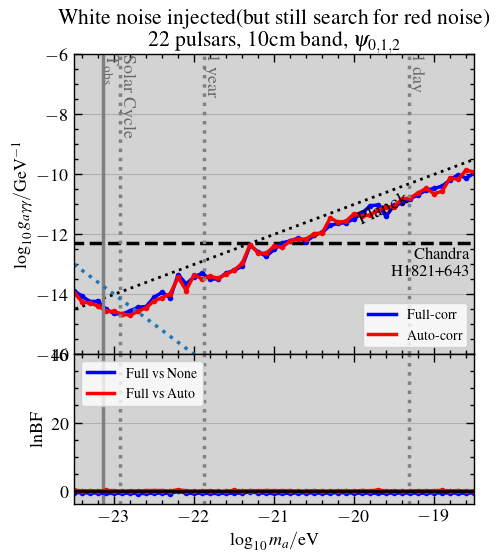

In [7]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.2  , -2.611, -2.749, -2.944, -3.223, -3.323, -3.516, -3.653,
       -3.619, -3.602, -3.472, -3.468, -3.441, -2.988, -3.528, -3.101,
       -3.348, -3.35 , -3.524, -3.479, -3.453, -3.322, -2.8  , -3.176,
       -3.29 , -3.147, -3.286, -3.173, -3.212, -3.316, -3.232, -3.317,
       -2.915, -3.15 , -3.219, -3.064, -3.248, -3.312, -3.249, -3.244,
       -3.33 , -3.171, -3.248, -3.173, -3.123, -3.406, -3.412, -3.078,
       -3.225, -3.008, -3.186])



ul_full = np.array([-2.13 , -2.427, -2.695, -2.789, -3.161, -3.394, -3.517, -3.503,
       -3.486, -3.562, -3.349, -3.292, -3.57 , -2.896, -3.31 , -3.169,
       -3.157, -3.447, -3.544, -3.448, -3.457, -3.417, -2.825, -3.143,
       -3.387, -3.261, -3.139, -3.179, -3.181, -3.397, -3.289, -3.293,
       -3.158, -3.189, -3.268, -3.235, -3.148, -3.002, -3.078, -3.558,
       -3.28 , -3.32 , -3.269, -3.233, -3.185, -3.225, -3.252, -3.134,
       -3.069, -3.287, -3.212])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("White noise injected(but still search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 




lbf_af = np.array([ 0.159, -0.059,  0.011, -0.068,  0.078, -0.006, -0.096, -0.007,
       -0.066,  0.035,  0.057,  0.038, -0.062,  0.258, -0.011, -0.11 ,
       -0.009,  0.014, -0.096, -0.131,  0.103, -0.039,  0.024, -0.003,
        0.044,  0.011,  0.004,  0.017, -0.1  , -0.061,  0.021, -0.077,
       -0.064, -0.014,  0.011, -0.066,  0.052, -0.026,  0.198, -0.071,
        0.013, -0.119, -0.027, -0.005,  0.003,  0.005,  0.097, -0.039,
        0.044, -0.103, -0.039])

lbf_nf = np.array([-0.559, -0.563, -0.686, -0.654, -0.79 , -0.76 , -0.734, -0.706,
       -0.84 , -0.8  , -0.733, -0.684, -0.822, -0.164, -0.731, -0.764,
       -0.687, -0.799, -0.804, -0.758, -0.749, -0.689, -0.338, -0.639,
       -0.73 , -0.797, -0.799, -0.716, -0.651, -0.611, -0.678, -0.734,
       -0.666, -0.57 , -0.611, -0.701, -0.735, -0.679, -0.786, -0.681,
       -0.745, -0.66 , -0.678, -0.749, -0.731, -0.595, -0.696, -0.634,
       -0.729, -0.726, -0.622])




axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# White | seed:60

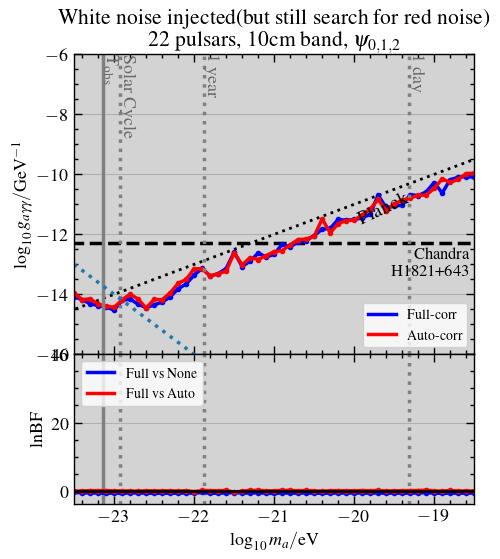

In [9]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.215, -2.532, -2.608, -2.884, -3.043, -3.192, -3.035, -2.952,
       -3.214, -3.613, -3.423, -3.536, -3.405, -3.187, -3.161, -2.899,
       -3.007, -3.338, -3.369, -3.382, -2.871, -3.373, -3.231, -3.395,
       -3.367, -3.332, -3.399, -3.306, -3.229, -3.312, -3.32 , -2.843,
       -3.408, -3.202, -3.195, -3.278, -3.215, -3.11 , -2.894, -3.373,
       -3.239, -3.226, -3.24 , -3.259, -3.344, -3.226, -3.007, -3.225,
       -3.224, -3.131, -3.218])




ul_full = np.array([-2.336, -2.533, -2.773, -2.93 , -3.074, -3.285, -3.054, -3.115,
       -3.387, -3.599, -3.609, -3.613, -3.543, -3.368, -3.313, -3.113,
       -2.99 , -3.351, -3.365, -3.296, -2.849, -3.43 , -3.345, -3.183,
       -3.408, -3.423, -3.184, -3.379, -3.296, -3.364, -3.296, -3.185,
       -3.261, -3.061, -3.187, -3.26 , -3.31 , -3.285, -2.744, -3.276,
       -3.305, -3.387, -3.131, -3.267, -3.241, -3.031, -3.479, -3.136,
       -3.154, -3.23 , -3.353])


axes[0].set_facecolor('lightgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("White noise injected(but still search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 




lbf_af = np.array([-0.107, -0.068,  0.033,  0.018,  0.029, -0.041, -0.048, -0.072,
       -0.124,  0.009, -0.05 , -0.046, -0.001, -0.12 ,  0.038, -0.279,
        0.067,  0.026, -0.004,  0.086, -0.427, -0.111,  0.095,  0.103,
        0.005, -0.021,  0.081,  0.116, -0.022,  0.072, -0.017, -0.119,
        0.002,  0.045,  0.01 , -0.019,  0.06 , -0.01 ,  0.079, -0.078,
       -0.044,  0.014,  0.044,  0.059,  0.167, -0.027, -0.137,  0.083,
       -0.093, -0.037, -0.076])

lbf_nf = np.array([-0.512, -0.619, -0.639, -0.679, -0.751, -0.69 , -0.776, -0.619,
       -0.677, -0.709, -0.772, -0.743, -0.743, -0.728, -0.661, -0.75 ,
       -0.508, -0.758, -0.727, -0.638, -0.566, -0.669, -0.719, -0.602,
       -0.752, -0.809, -0.643, -0.725, -0.696, -0.668, -0.734, -0.743,
       -0.715, -0.673, -0.685, -0.673, -0.683, -0.725, -0.645, -0.765,
       -0.663, -0.769, -0.688, -0.651, -0.583, -0.702, -0.779, -0.724,
       -0.694, -0.727, -0.658])




axes[1].set_facecolor('lightgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# Red | seed:20

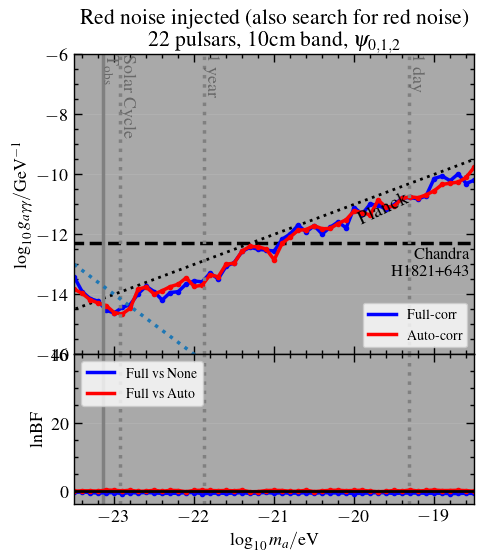

In [11]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.083, -2.325, -2.638, -2.846, -3.031, -3.363, -3.515, -3.419,
       -2.883, -2.912, -3.247, -3.235, -3.201, -3.22 , -3.106, -3.493,
       -3.554, -3.298, -3.474, -3.15 , -3.217, -2.907, -2.857, -2.973,
       -3.142, -3.608, -3.155, -3.046, -2.922, -2.995, -2.967, -3.169,
       -3.26 , -3.196, -3.167, -2.972, -3.13 , -3.31 , -2.914, -3.254,
       -3.313, -3.157, -3.205, -3.335, -3.34 , -3.304, -3.191, -3.252,
       -3.315, -3.259, -3.023])


ul_full = np.array([-1.675, -2.267, -2.599, -2.786, -3.187, -3.377, -3.294, -3.299,
       -3.035, -2.887, -3.166, -3.546, -3.397, -3.468, -3.311, -3.313,
       -3.439, -3.249, -3.541, -3.219, -3.198, -2.926, -2.886, -3.056,
       -3.181, -3.314, -3.019, -2.943, -2.751, -3.077, -2.971, -3.343,
       -3.221, -3.142, -3.442, -2.864, -3.179, -2.948, -3.091, -3.315,
       -3.265, -3.148, -3.227, -3.376, -3.371, -2.895, -2.913, -3.167,
       -3.042, -3.462, -3.451])



axes[0].set_facecolor('darkgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Red noise injected (also search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.115, -0.028, -0.027, -0.106,  0.188,  0.127, -0.053,  0.134,
       -0.179, -0.104,  0.116, -0.162,  0.104,  0.044, -0.279,  0.084,
        0.117,  0.069, -0.003,  0.07 , -0.032,  0.144, -0.302, -0.247,
        0.054,  0.094,  0.057, -0.156, -0.161,  0.138, -0.26 , -0.058,
        0.108,  0.139, -0.007,  0.075,  0.124, -0.11 , -0.286, -0.18 ,
        0.082, -0.095,  0.205, -0.097,  0.068,  0.186,  0.036,  0.059,
        0.121,  0.013, -0.156])


lbf_nf = np.array([-0.497, -0.355, -0.57 , -0.677, -0.589, -0.562, -0.825, -0.567,
       -0.65 , -0.501, -0.648, -0.784, -0.75 , -0.738, -0.528, -0.541,
       -0.842, -0.763, -0.684, -0.792, -0.687, -0.554, -0.816, -0.631,
       -0.52 , -0.735, -0.586, -0.738, -0.686, -0.586, -0.747, -0.543,
       -0.652, -0.653, -0.67 , -0.827, -0.734, -0.665, -0.525, -0.633,
       -0.803, -0.698, -0.69 , -0.688, -0.737, -0.736, -0.744, -0.855,
       -0.811, -0.741, -0.807])


axes[1].set_facecolor('darkgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# Red | seed:40

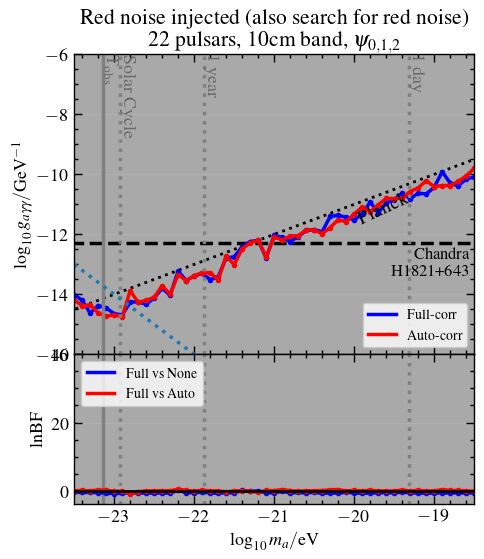

In [12]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.447, -2.734, -2.811, -3.172, -3.391, -3.432, -3.615, -2.835,
       -3.319, -3.358, -3.356, -3.067, -3.45 , -2.897, -3.2  , -3.133,
       -3.132, -3.231, -3.574, -2.883, -3.265, -2.847, -2.737, -2.755,
       -3.403, -2.838, -3.043, -3.011, -3.1  , -3.006, -3.113, -3.335,
       -3.229, -3.073, -3.23 , -3.077, -2.945, -3.202, -3.073, -2.96 ,
       -3.064, -3.143, -3.029, -3.008, -2.871, -3.164, -3.23 , -3.328,
       -3.294, -3.21 , -3.056])


ul_full = np.array([-2.267, -2.555, -3.083, -2.928, -3.108, -3.402, -3.541, -3.218,
       -3.303, -3.491, -3.373, -3.156, -3.488, -2.781, -3.197, -3.144,
       -3.16 , -3.466, -3.475, -2.939, -3.008, -2.768, -2.698, -2.752,
       -3.444, -2.792, -2.958, -3.197, -3.13 , -3.026, -3.096, -3.271,
       -2.86 , -2.92 , -3.087, -3.275, -3.185, -2.877, -3.334, -3.113,
       -3.097, -2.988, -3.27 , -3.184, -3.311, -3.193, -2.767, -3.242,
       -3.448, -3.305, -3.348])



axes[0].set_facecolor('darkgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Red noise injected (also search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.031,  0.086, -0.016,  0.205,  0.174, -0.146, -0.155, -0.882,
       -0.281, -0.088, -0.014,  0.025, -0.01 ,  0.452,  0.112, -0.101,
        0.105, -0.017, -0.015, -0.364, -0.021, -0.007, -0.116, -0.494,
        0.078,  0.01 ,  0.347,  0.053, -0.187,  0.01 , -0.029,  0.06 ,
        0.262,  0.346, -0.061,  0.097, -0.044,  0.14 , -0.053, -0.089,
       -0.056,  0.186, -0.039,  0.087, -0.072, -0.048,  0.313,  0.076,
        0.063, -0.025, -0.165])


lbf_nf = np.array([-0.452, -0.522, -0.488, -0.586, -0.74 , -0.818, -0.749, -0.612,
       -0.666, -0.677, -0.687, -0.654, -0.719,  0.18 , -0.621, -0.546,
       -0.448, -0.62 , -0.768, -0.575, -0.673,  0.102, -0.19 , -0.055,
       -0.606, -0.646, -0.153, -0.653, -0.523, -0.667, -0.479, -0.797,
       -0.642, -0.757, -0.409, -0.67 , -0.725, -0.746, -0.576, -0.577,
       -0.652, -0.426, -0.579, -0.718, -0.688, -0.735, -0.591, -0.691,
       -0.62 , -0.667, -0.637])


axes[1].set_facecolor('darkgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# Red | seed:60

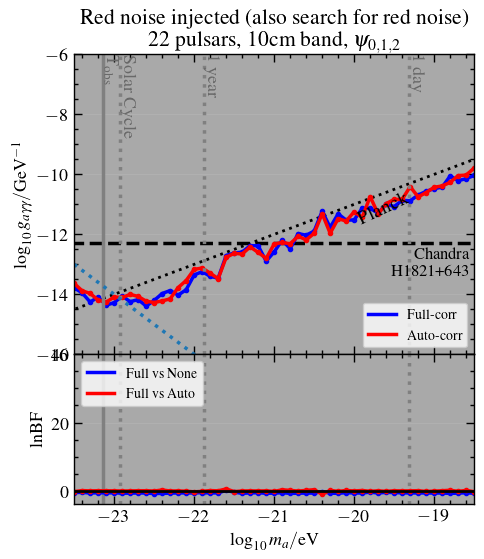

In [13]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.892, -2.238, -2.426, -2.748, -2.917, -2.844, -2.961, -2.958,
       -3.126, -3.384, -3.528, -3.576, -3.606, -3.329, -3.196, -2.925,
       -2.977, -3.25 , -3.533, -2.922, -2.889, -3.012, -2.875, -3.158,
       -3.458, -3.079, -3.127, -3.271, -3.119, -3.341, -3.222, -2.666,
       -3.421, -3.032, -3.213, -3.004, -3.291, -2.697, -3.378, -3.13 ,
       -3.094, -3.19 , -2.867, -3.308, -3.262, -3.187, -3.243, -3.224,
       -3.098, -3.18 , -3.048])


ul_full = np.array([-2.041, -2.307, -2.713, -2.645, -3.018, -3.033, -2.912, -3.2  ,
       -3.23 , -3.547, -3.46 , -3.328, -3.33 , -3.58 , -3.503, -3.109,
       -3.101, -3.354, -3.518, -2.864, -2.875, -2.95 , -2.832, -2.938,
       -3.55 , -3.341, -3.048, -3.435, -3.03 , -3.185, -3.149, -2.585,
       -3.223, -2.872, -3.185, -3.275, -2.989, -3.09 , -3.352, -3.144,
       -3.33 , -3.221, -3.337, -3.246, -3.225, -3.23 , -3.283, -3.01 ,
       -3.266, -3.3  , -3.293])




axes[0].set_facecolor('darkgray')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Red noise injected (also search for red noise)\n 22 pulsars, 10cm band,"+r" $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.259,  0.031, -0.05 , -0.003, -0.02 , -0.035, -0.08 , -0.057,
       -0.013, -0.007, -0.094,  0.21 , -0.079, -0.058, -0.145, -0.32 ,
       -0.188,  0.04 , -0.045,  0.525, -0.257, -0.078, -0.043, -0.066,
       -0.046, -0.21 ,  0.264,  0.106, -0.116,  0.102,  0.296, -1.048,
        0.1  , -0.199,  0.074, -0.069,  0.062, -0.178, -0.028, -0.184,
       -0.018, -0.055, -0.037,  0.007, -0.219, -0.119, -0.007,  0.135,
       -0.19 ,  0.09 , -0.293])



lbf_nf = np.array([-0.546, -0.482, -0.682, -0.602, -0.635, -0.631, -0.717, -0.727,
       -0.654, -0.691, -0.842, -0.781, -0.716, -0.649, -0.648, -0.67 ,
       -0.545, -0.68 , -0.624,  0.096, -0.431, -0.764, -0.65 , -0.593,
       -0.758, -0.716, -0.576, -0.794, -0.732, -0.698, -0.71 , -0.265,
       -0.737, -0.762, -0.572, -0.676, -0.671, -0.422, -0.679, -0.478,
       -0.549, -0.627, -0.66 , -0.662, -0.659, -0.702, -0.662, -0.801,
       -0.691, -0.618, -0.741])


axes[1].set_facecolor('darkgray')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



In [10]:
crit = np.where(lbf_nf>10)[0]
np.array([crit,l10ma[crit],lbf_nf[crit]]).T
crit

array([], dtype=int64)

In [11]:
# # True
# fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
# lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
# plt.subplots_adjust(left=0.15,
#                     bottom=0.10, 
#                     right=0.95, 
#                     top=0.85, 
#                     wspace=0.0, 
#                     hspace=0.0)


# l10ma = np.arange(0,51)*0.1 -23.5


# ul_auto = np.array([-1.269, -1.563, -1.837, -2.103, -2.336, -2.501, -2.515, -3.142,
#        -3.489, -3.461, -3.423, -3.443, -3.369, -3.452, -3.495, -3.365,
#        -3.4  , -3.387, -3.227, -2.962, -3.116, -3.139, -3.031, -3.063,
#        -3.163, -3.026, -3.14 , -3.181, -3.118, -3.197, -3.073, -3.138,
#        -2.745, -3.227, -2.707, -3.258, -3.087, -2.977, -3.029, -3.047,
#        -2.973, -2.995, -3.145, -3.121, -2.868, -3.195, -3.218, -2.991,
#        -3.105, -2.713, -3.17 ])

# ul_full = np.array([-1.097, -1.385, -1.688, -1.988, -2.21 , -2.405, -2.436, -2.941,
#        -3.535, -3.374, -3.379, -3.399, -3.173, -3.416, -3.484, -3.459,
#        -3.351, -3.492, -3.084, -2.821, -3.21 , -3.168, -2.935, -3.102,
#        -3.149, -3.087, -3.131, -3.183, -3.03 , -2.892, -3.076, -3.127,
#        -3.087, -3.182, -2.705, -3.2  , -2.952, -2.917, -3.107, -2.841,
#        -2.979, -3.085, -3.163, -3.105, -2.963, -3.079, -3.252, -3.231,
#        -3.207, -3.146, -3.106])

# axes[0].scatter(-23,l10S_to_l10ga(-2.7,-23),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
# axes[0].set_facecolor('lightblue')
# make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
# axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
# axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

# lbf_af = np.array([ 2.294e+00,  2.251e+00,  2.354e+00,  2.596e+00,  2.288e+00,
#         2.044e+00,  5.288e-01,  4.083e-02,  4.254e-03,  1.689e-02,
#         4.711e-02,  1.317e-02,  1.823e-01,  1.810e-03,  7.737e-03,
#        -3.525e-02,  1.942e-02, -3.909e-03,  8.338e-02,  1.050e-01,
#        -4.707e-02,  6.227e-02,  1.480e-01, -9.809e-04,  3.684e-02,
#         2.438e-03,  4.088e-02, -2.282e-03,  8.752e-02,  1.646e-01,
#         1.820e-02,  5.231e-02, -2.773e-01, -7.316e-02, -3.608e-01,
#         4.382e-02,  2.356e-01, -9.215e-02,  6.151e-02,  7.337e-02,
#        -1.054e-01, -7.160e-02, -6.645e-02, -7.458e-02, -2.423e-02,
#         1.041e-02,  4.155e-02, -1.040e-01,  7.293e-02,  4.610e-02,
#         4.135e-02])



# lbf_nf = np.array([ 3.405,  3.249,  3.144,  3.391,  3.208,  3.055,  2.234, -0.633,
#        -0.729, -0.654, -0.741, -0.722, -0.543, -0.681, -0.752, -0.748,
#        -0.709, -0.776, -0.575, -0.276, -0.628, -0.613, -0.338, -0.582,
#        -0.571, -0.657, -0.616, -0.668, -0.566, -0.436, -0.584, -0.653,
#        -0.648, -0.685, -0.56 , -0.748, -0.518, -0.622, -0.693, -0.453,
#        -0.526, -0.65 , -0.657, -0.678, -0.626, -0.656, -0.708, -0.661,
#        -0.718, -0.685, -0.689])


# axes[1].set_facecolor('lightblue')
# make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -22.5 | -2.65 | seed:20

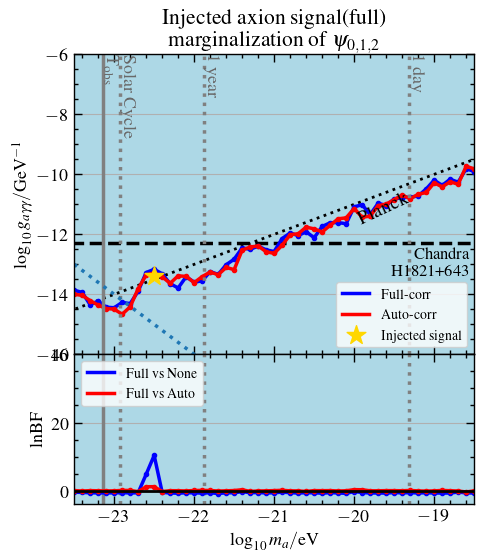

In [12]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.253, -2.39 , -2.665, -2.915, -3.13 , -3.249, -3.52 , -3.372,
       -2.867, -2.513, -2.535, -2.772, -3.088, -2.939, -3.058, -3.365,
       -3.266, -3.213, -3.401, -3.261, -3.431, -2.882, -2.878, -2.943,
       -3.238, -3.39 , -3.219, -2.968, -3.036, -2.916, -3.074, -3.276,
       -3.156, -3.038, -3.106, -2.895, -3.286, -3.348, -3.1  , -3.148,
       -3.101, -3.048, -3.269, -3.222, -3.261, -3.039, -3.273, -3.204,
       -3.386, -2.887, -3.072])

ul_full = np.array([-2.118, -2.292, -2.804, -2.777, -3.084, -3.203, -3.123, -3.266,
       -2.951, -2.429, -2.421, -2.672, -3.101, -3.343, -3.069, -3.35 ,
       -3.408, -3.195, -3.392, -3.17 , -3.084, -2.807, -2.955, -2.948,
       -3.175, -3.328, -2.995, -2.911, -3.098, -3.068, -3.37 , -3.094,
       -3.07 , -3.163, -3.302, -2.839, -2.869, -3.298, -3.018, -3.197,
       -3.076, -3.129, -3.217, -3.276, -3.145, -2.949, -3.224, -3.119,
       -3.318, -2.965, -3.164])

axes[0].scatter(-22.5,l10S_to_l10ga(-2.65,-22.5),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 0.046, -0.093,  0.023, -0.022, -0.06 , -0.036,  0.093,  0.079,
       -0.274,  1.162,  1.182, -0.243,  0.005, -0.002, -0.07 ,  0.063,
        0.095,  0.07 , -0.094, -0.03 ,  0.049,  0.292, -0.218, -0.066,
       -0.04 ,  0.033,  0.12 , -0.035, -0.052, -0.21 ,  0.028,  0.007,
        0.031, -0.076, -0.018,  0.313,  0.278, -0.027, -0.025,  0.024,
        0.018, -0.015,  0.076, -0.056, -0.105, -0.05 ,  0.083, -0.002,
       -0.087, -0.371, -0.047])



lbf_nf = np.array([-0.443, -0.492, -0.621, -0.645, -0.64 , -0.645, -0.552, -0.682,
       -0.59 ,  4.818,    np.log(1.4240)+10, -0.473, -0.671, -0.739, -0.595, -0.631,
       -0.708, -0.603, -0.83 , -0.616, -0.604, -0.269, -0.591, -0.537,
       -0.658, -0.61 , -0.413, -0.582, -0.681, -0.586, -0.621, -0.731,
       -0.564, -0.668, -0.768, -0.231, -0.531, -0.681, -0.664, -0.708,
       -0.538, -0.639, -0.575, -0.667, -0.6  , -0.681, -0.687, -0.69 ,
       -0.39 , -0.642, -0.676])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -22.5 | -2.65 | seed:40

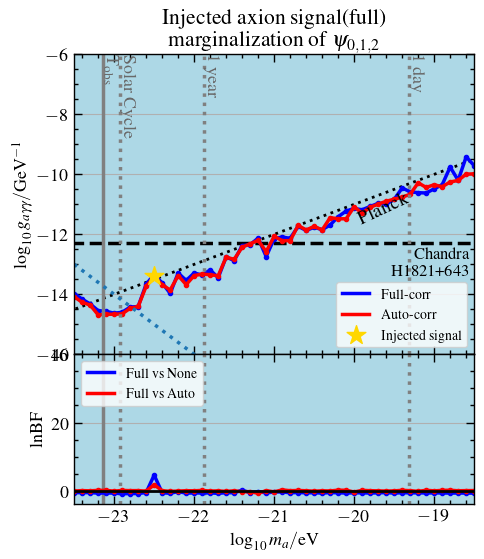

In [13]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.336, -2.622, -2.814, -3.239, -3.318, -3.421, -3.506, -3.421,
       -3.46 , -2.884, -2.682, -3.034, -3.313, -2.93 , -3.333, -3.131,
       -3.181, -3.302, -3.439, -2.916, -3.09 , -2.784, -2.771, -2.755,
       -3.234, -2.821, -3.068, -3.165, -2.759, -3.011, -2.991, -3.208,
       -2.9  , -3.037, -3.138, -2.837, -3.152, -3.053, -3.049, -3.054,
       -3.084, -3.115, -3.122, -2.838, -3.092, -3.103, -3.269, -3.211,
       -3.259, -3.151, -3.238])

ul_full = np.array([-2.228, -2.517, -2.777, -3.098, -3.222, -3.386, -3.453, -3.381,
       -3.462, -2.818, -2.597, -2.977, -3.423, -2.845, -3.192, -3.046,
       -3.213, -3.142, -3.501, -2.91 , -3.13 , -2.734, -2.798, -2.683,
       -3.396, -2.901, -2.943, -3.091, -2.789, -3.026, -3.021, -3.199,
       -3.145, -2.968, -2.879, -2.893, -3.037, -3.027, -3.023, -3.143,
       -3.093, -2.811, -3.038, -3.167, -3.278, -3.239, -3.204, -2.713,
       -3.255, -2.572, -2.966])

axes[0].scatter(-22.5,l10S_to_l10ga(-2.65,-22.5),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-0.082,  0.03 , -0.036,  0.103,  0.102, -0.13 ,  0.09 ,  0.019,
        0.03 , -0.127,  1.742,  0.006, -0.184, -0.106,  0.004, -0.026,
        0.094, -0.101, -0.046, -0.206, -0.029, -0.304, -0.263, -0.765,
        0.02 , -0.338,  0.244,  0.   ,  0.072, -0.016, -0.137, -0.028,
       -0.069,  0.158,  0.128, -0.381,  0.116,  0.006, -0.044, -0.103,
       -0.047,  0.115,  0.014, -0.191,  0.131, -0.045,  0.099,  0.146,
       -0.019,  0.029,  0.037])



lbf_nf = np.array([-0.565, -0.565, -0.558, -0.711, -0.666, -0.708, -0.883, -0.835,
       -0.831, -0.528,  4.579, -0.606, -0.747, -0.257, -0.715, -0.658,
       -0.676, -0.646, -0.771, -0.579, -0.599,  0.17 , -0.593, -0.249,
       -0.644, -0.372, -0.36 , -0.611, -0.526, -0.619, -0.598, -0.703,
       -0.544, -0.614, -0.686, -0.617, -0.619, -0.697, -0.616, -0.552,
       -0.713, -0.583, -0.632, -0.624, -0.671, -0.647, -0.664, -0.706,
       -0.677, -0.7  , -0.711])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -22.5 | -2.65 | seed:60

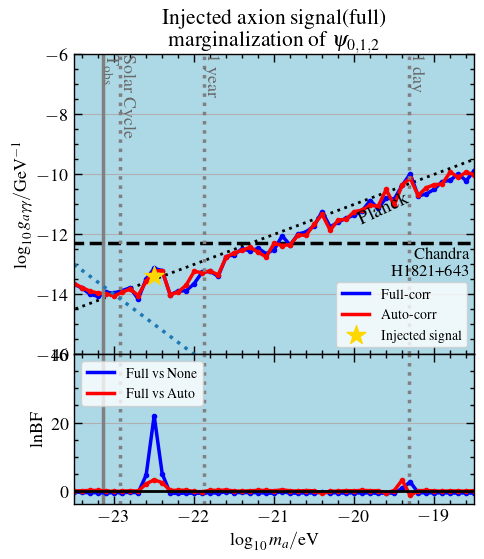

In [14]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.897, -2.131, -2.352, -2.514, -2.635, -2.812, -2.786, -2.778,
       -3.097, -2.72 , -2.479, -2.568, -3.471, -3.48 , -3.35 , -2.993,
       -3.132, -3.176, -3.408, -2.915, -2.87 , -2.891, -2.884, -3.156,
       -3.405, -3.054, -3.229, -3.3  , -3.079, -3.187, -2.923, -2.689,
       -3.318, -3.083, -3.151, -3.   , -3.048, -2.986, -3.119, -2.657,
       -3.291, -2.711, -2.582, -3.261, -3.105, -3.102, -3.18 , -2.879,
       -3.154, -3.086, -3.267])

ul_full = np.array([-1.915, -2.15 , -2.453, -2.624, -2.594, -2.71 , -2.732, -2.737,
       -3.212, -2.645, -2.39 , -2.563, -3.473, -3.448, -3.534, -3.4  ,
       -3.116, -3.19 , -3.455, -2.903, -2.932, -2.838, -3.01 , -3.023,
       -3.298, -3.264, -2.909, -3.313, -3.047, -3.075, -2.97 , -2.595,
       -3.209, -3.147, -3.116, -3.117, -3.072, -2.83 , -3.194, -2.937,
       -3.087, -2.727, -2.442, -3.273, -3.313, -3.256, -3.099, -3.158,
       -3.042, -3.372, -3.136])

axes[0].scatter(-22.5,l10S_to_l10ga(-2.65,-22.5),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-4.497e-02, -2.154e-02,  9.743e-02,  7.157e-02, -7.055e-02,
       -1.896e-01, -1.237e-01, -1.375e-02, -1.164e-01,  1.998e+00,
        3.215e+00,  2.369e+00,  7.963e-02,  1.295e-01,  1.573e-01,
       -2.293e-01, -3.047e-01,  1.262e-01,  8.052e-02,  2.047e-01,
       -7.385e-02, -1.289e-01, -3.036e-02,  1.083e-01,  7.950e-02,
       -2.302e-02,  2.681e-01, -2.889e-02, -9.991e-02,  4.532e-02,
       -2.685e-02, -8.078e-01, -1.503e-01, -1.260e-01,  3.545e-02,
       -3.745e-02,  1.178e-01, -1.500e-03,  4.648e-03, -6.643e-01,
        6.016e-02,  3.108e+00, -1.394e+00, -5.072e-03,  8.029e-02,
       -4.948e-02, -1.466e-01, -5.046e-02, -6.646e-02, -1.428e-01,
        4.249e-02])



lbf_nf = np.array([-0.356, -0.484, -0.612, -0.567, -0.641, -0.576, -0.556, -0.475,
       -0.594,  4.604,    22.0,  5.047, -0.772, -0.764, -0.705, -0.744,
       -0.73 , -0.575, -0.741, -0.24 , -0.574, -0.515, -0.58 , -0.569,
       -0.679, -0.74 , -0.252, -0.731, -0.684, -0.615, -0.686, -0.4  ,
       -0.603, -0.611, -0.702, -0.592, -0.706, -0.576, -0.807, -0.613,
       -0.752,  0.72 ,  2.602, -0.603, -0.591, -0.636, -0.595, -0.653,
       -0.682, -0.613, -0.728])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -21.0 | -2.75 | seed:20

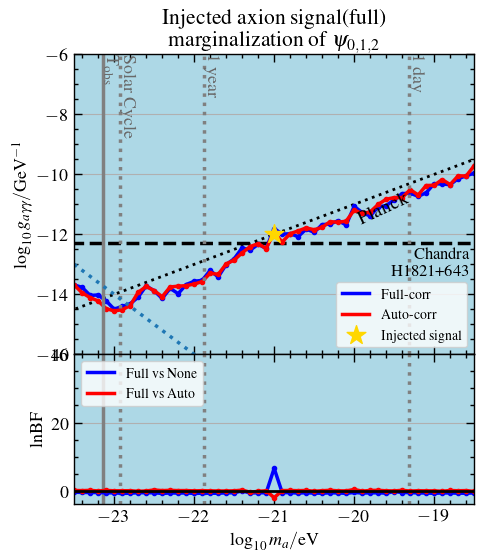

In [15]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.942, -2.306, -2.565, -2.775, -3.134, -3.308, -3.369, -3.33 ,
       -2.99 , -2.894, -3.131, -3.434, -3.209, -3.284, -3.366, -3.413,
       -3.431, -3.249, -3.391, -3.143, -3.113, -2.971, -2.863, -2.868,
       -3.129, -2.691, -3.113, -2.932, -2.942, -2.94 , -3.104, -3.123,
       -3.032, -3.153, -3.217, -2.948, -3.161, -3.209, -3.06 , -2.986,
       -3.031, -3.131, -2.966, -3.243, -3.028, -3.12 , -3.03 , -3.297,
       -3.105, -3.211, -2.97 ])

ul_full = np.array([-1.941, -2.125, -2.493, -2.576, -2.875, -3.249, -3.259, -3.274,
       -3.15 , -2.873, -3.139, -3.493, -3.256, -3.534, -3.33 , -3.321,
       -3.39 , -3.16 , -3.476, -3.163, -3.073, -2.805, -2.985, -2.888,
       -3.127, -2.562, -2.848, -2.937, -3.132, -2.98 , -3.187, -3.031,
       -3.111, -3.101, -3.343, -2.822, -3.13 , -3.344, -3.142, -3.197,
       -3.11 , -2.999, -3.084, -3.288, -3.27 , -3.066, -3.181, -3.297,
       -3.2  , -3.204, -3.217])

axes[0].scatter(-21.0,l10S_to_l10ga(-2.75,-21.0),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([ 7.995e-02,  2.305e-02,  1.068e-01, -7.614e-02,  9.378e-02,
       -2.511e-02, -1.538e-02,  1.226e-03, -1.777e-01, -6.802e-02,
        2.221e-01,  2.644e-02,  1.213e-01,  3.147e-02,  4.147e-02,
       -4.503e-02,  1.301e-02, -3.902e-02, -7.957e-02, -7.181e-02,
       -3.194e-02,  1.734e-01, -4.374e-01, -1.787e-01, -9.685e-03,
       -2.043e+00,  3.505e-02,  6.832e-02,  5.851e-03,  7.809e-02,
       -1.568e-01, -1.231e-03,  1.198e-01, -3.043e-02, -5.689e-02,
        3.648e-01, -1.258e-01,  8.090e-02,  1.158e-01, -2.339e-02,
       -5.792e-02,  1.161e-01, -9.623e-02, -2.475e-03, -3.802e-02,
       -4.209e-02, -1.615e-01,  6.355e-02, -1.565e-02,  3.505e-02,
       -2.204e-01])




lbf_nf = np.array([-0.44 , -0.502, -0.544, -0.53 , -0.618, -0.638, -0.773, -0.74 ,
       -0.579, -0.603, -0.6  , -0.812, -0.663, -0.696, -0.649, -0.802,
       -0.721, -0.743, -0.739, -0.631, -0.61 , -0.043, -0.682, -0.593,
       -0.614,    np.log(0.6469)+7, -0.534, -0.595, -0.685, -0.606, -0.712, -0.738,
       -0.627, -0.652, -0.778, -0.504, -0.685, -0.64 , -0.61 , -0.721,
       -0.251, -0.528, -0.561, -0.654, -0.677, -0.78 , -0.652, -0.665,
       -0.723, -0.746, -0.63 ])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -21.0 | -2.75 | seed:40

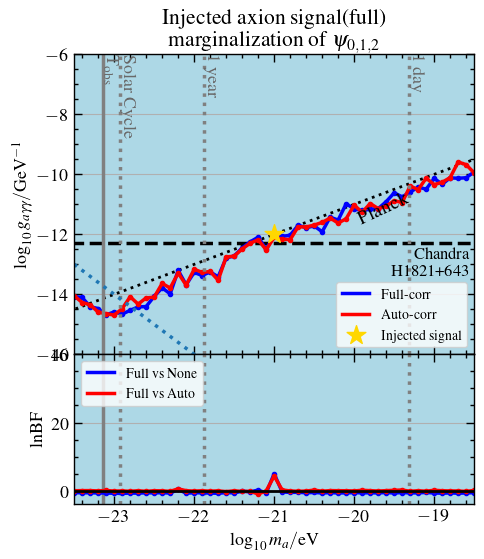

In [16]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.304, -2.629, -2.802, -3.15 , -3.3  , -3.449, -3.334, -3.037,
       -3.381, -3.273, -3.35 , -2.992, -3.245, -2.846, -3.35 , -2.92 ,
       -3.124, -3.194, -3.584, -2.909, -2.984, -2.841, -2.752, -2.737,
       -3.172, -2.855, -3.014, -3.133, -2.802, -2.91 , -2.947, -2.958,
       -2.914, -3.18 , -3.135, -2.78 , -3.123, -2.928, -3.197, -3.214,
       -3.136, -3.295, -2.844, -3.067, -2.784, -3.098, -3.121, -3.064,
       -2.643, -2.833, -3.208])

ul_full = np.array([-2.328, -2.461, -2.867, -3.029, -3.339, -3.343, -3.513, -3.49 ,
       -3.475, -3.563, -3.325, -3.139, -3.439, -2.76 , -3.336, -3.026,
       -3.229, -3.207, -3.473, -2.94 , -2.978, -2.81 , -2.707, -2.651,
       -3.157, -2.768, -2.923, -2.987, -2.753, -2.934, -2.976, -3.269,
       -2.883, -3.081, -2.634, -2.909, -3.061, -3.119, -3.201, -3.068,
       -2.874, -3.106, -3.048, -2.981, -3.151, -2.892, -3.186, -3.072,
       -3.187, -3.269, -3.173])


axes[0].scatter(-21.0,l10S_to_l10ga(-2.75,-21.0),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-1.042e-02,  2.794e-02,  2.985e-02, -5.656e-02,  6.939e-02,
       -9.985e-02, -5.802e-02, -1.645e-01, -1.154e-03, -1.811e-01,
        0.000e+00, -3.700e-02, -1.941e-01,  5.575e-01,  3.474e-03,
       -1.064e-01, -1.057e-02, -1.301e-01, -3.555e-02, -2.625e-01,
       -2.711e-02, -2.027e-01, -1.912e-01, -9.493e-01, -7.719e-02,
        4.296e+00,  2.350e-01, -6.423e-02, -1.651e-01, -9.689e-02,
        1.843e-01, -1.536e-01,  3.517e-02,  1.174e-03, -1.061e-02,
       -6.673e-02,  1.320e-01,  1.916e-02, -9.113e-02,  2.296e-02,
        1.204e-01,  2.029e-01, -1.609e-01,  2.361e-03, -1.453e-01,
        1.362e-01, -1.076e-02, -5.838e-02, -7.482e-02, -2.107e-01,
        9.087e-02])





lbf_nf = np.array([-0.57 , -0.608, -0.614, -0.663, -0.681, -0.763, -0.772, -0.7  ,
       -0.711, -0.612, -0.641, -0.584, -0.697,  0.369, -0.728, -0.606,
       -0.622, -0.699, -0.751, -0.548, -0.646, -0.14 , -0.327,  0.176,
       -0.675,    np.log(0.9787)+5, -0.366, -0.499, -0.465, -0.61 , -0.517, -0.669,
       -0.567, -0.666, -0.635, -0.568, -0.63 , -0.617, -0.651, -0.53 ,
       -0.686, -0.538, -0.65 , -0.636, -0.504, -0.684, -0.733, -0.651,
       -0.734, -0.663, -0.567])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -21.0 | -2.75 | seed:60

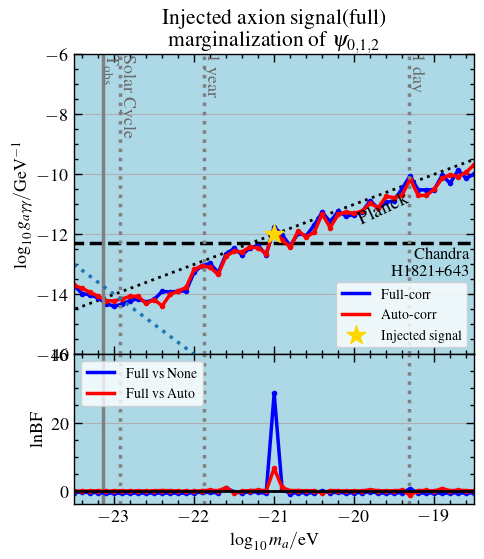

In [17]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.953, -2.158, -2.39 , -2.616, -2.868, -2.975, -3.008, -3.023,
       -3.125, -3.46 , -3.433, -3.741, -3.457, -3.449, -3.427, -2.922,
       -2.9  , -3.059, -3.389, -2.878, -2.822, -2.938, -2.875, -3.007,
       -3.298, -2.597, -3.055, -3.378, -2.945, -3.241, -3.19 , -2.676,
       -3.233, -2.891, -2.91 , -3.059, -3.074, -2.92 , -3.168, -2.892,
       -3.031, -3.047, -2.606, -3.257, -3.36 , -3.257, -2.989, -2.968,
       -3.128, -3.087, -2.929])

ul_full = np.array([-1.965, -2.331, -2.473, -2.676, -2.967, -3.154, -3.178, -3.163,
       -3.204, -3.418, -3.425, -3.26 , -3.375, -3.457, -3.541, -3.015,
       -2.899, -2.924, -3.335, -2.809, -2.727, -3.041, -2.897, -2.933,
       -3.337, -2.515, -2.868, -3.341, -3.017, -3.207, -2.95 , -2.624,
       -3.031, -2.793, -3.048, -3.095, -3.1  , -2.834, -3.188, -3.093,
       -3.133, -2.827, -2.505, -3.072, -3.176, -3.262, -2.891, -3.253,
       -2.918, -3.287, -3.246])


axes[0].scatter(-21.0,l10S_to_l10ga(-2.75,-21.0),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 

lbf_af = np.array([-7.887e-02, -8.205e-02,  -0.065, -8.126e-03, -1.733e-01,
       -2.276e-02, -5.484e-03, -1.030e-01, -3.355e-02, -6.640e-02,
       -1.112e-02,  0.054,  1.659e-02, -8.311e-02, -1.340e-01,
       -1.733e-01,  2.588e-02,  1.644e-01,  1.854e-03,  9.075e-01,
       -7.062e-01, -1.245e-01,  5.034e-02,  1.485e-01,  2.396e-02,
        6.540e+00,  9.581e-01,  2.985e-02,  6.235e-02, -3.160e-02,
        2.869e-02, -6.758e-01,  4.401e-02,  9.852e-03, -6.408e-02,
       -2.644e-03, -4.862e-02,  2.985e-01,  6.219e-03, -3.270e-02,
       -1.394e-02,  1.359e-01, -1.316e+00,  3.118e-02,  8.190e-02,
       -1.017e-01,  6.433e-01, -5.296e-03,  1.701e-01,  1.416e-02,
       -3.663e-02])





lbf_nf = np.array([-0.528, -0.424, -0.563, -0.559, -0.729, -0.724, -0.718, -0.682,
       -0.712, -0.705, -0.703, -0.734, -0.679, -0.733, -0.701, -0.627,
       -0.396, -0.482, -0.675,  0.834, -0.346, -0.672, -0.251, -0.473,
       -0.744,    np.log(0.6476)+29,  0.391, -0.837, -0.567, -0.645, -0.606, -0.027,
       -0.59 , -0.461, -0.704, -0.559, -0.603, -0.271, -0.706, -0.671,
       -0.64 , -0.6  ,  0.608, -0.662, -0.734, -0.616, -0.772, -0.692,
       -0.633, -0.712, -0.635])


axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -20.0 | -2.70 | seed:20

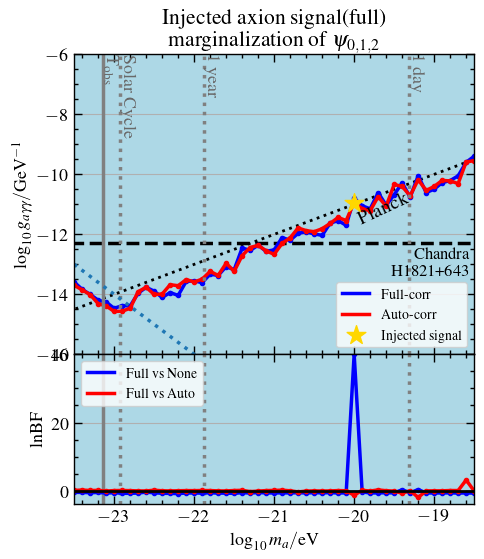

In [18]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.954, -2.207, -2.465, -2.868, -3.043, -3.325, -3.419, -3.419,
       -2.967, -2.919, -3.261, -3.346, -3.134, -3.269, -3.163, -3.343,
       -3.349, -3.191, -3.426, -3.119, -3.489, -3.063, -2.895, -2.921,
       -3.209, -3.421, -3.155, -3.073, -2.843, -3.033, -3.168, -3.168,
       -3.092, -2.993, -3.197, -2.688, -3.003, -3.168, -2.8  , -3.218,
       -2.594, -2.76 , -3.172, -2.735, -3.192, -3.161, -3.058, -3.176,
       -3.362, -2.742, -2.8  ])

ul_full = np.array([-1.844, -2.191, -2.458, -2.752, -2.913, -3.224, -3.23 , -3.343,
       -3.018, -2.921, -3.15 , -3.461, -3.395, -3.593, -3.224, -3.31 ,
       -3.465, -3.283, -3.428, -3.23 , -3.437, -2.81 , -2.992, -2.917,
       -3.224, -3.273, -2.963, -3.153, -3.02 , -3.074, -3.24 , -3.391,
       -3.082, -3.1  , -3.355, -2.551, -2.903, -3.107, -2.666, -3.187,
       -2.936, -2.639, -3.219, -2.601, -3.264, -3.25 , -3.132, -3.165,
       -3.106, -2.754, -2.655])


axes[0].scatter(-20.0,l10S_to_l10ga(-2.7,-20.0),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 


lbf_af = np.array([ 9.055e-02,  1.900e-01,  7.062e-02,  9.654e-02, -1.048e-01,
        4.212e-02,  7.176e-02,  2.284e-02, -5.295e-02, -6.496e-02,
        1.510e-01, -2.062e-02, -6.665e-02, -1.443e-02,  3.433e-02,
        1.942e-02,  6.329e-02,  3.759e-02, -4.750e-02, -6.814e-02,
        5.957e-02,  1.132e-01, -2.618e-01, -1.110e-01,  4.087e-02,
        8.758e-02,  1.644e-01, -2.327e-02, -3.490e-01, -1.077e-01,
       -5.076e-02, -8.864e-02, -6.294e-02,  3.881e-02, -2.582e-02,
       -1.323e+00,  1.281e-01, -1.003e-01,  2.355e-01, -1.286e-03,
       -1.150e-01, -7.378e-01,  2.384e-02, -1.964e+00, -5.136e-02,
       -3.461e-02, -3.486e-02,  5.407e-02,  4.911e-02,  3.145e+00,
       -7.274e-02])


lbf_nf = np.array([-0.474, -0.5  , -0.588, -0.52 , -0.683, -0.597, -0.747, -0.77 ,
       -0.682, -0.408, -0.62 , -0.754, -0.78 , -0.857, -0.669, -0.679,
       -0.711, -0.606, -0.708, -0.71 , -0.787, -0.569, -0.685, -0.535,
       -0.649, -0.668, -0.625, -0.66 , -0.579, -0.664, -0.571, -0.635,
       -0.572, -0.67 , -0.643,    inf, -0.358, -0.669, -0.639, -0.604,
       -0.648,  0.287, -0.615,  0.341, -0.655, -0.679, -0.654, -0.639,
       -0.696, -0.658, -0.711])








axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -20.0 | -2.70 | seed:40

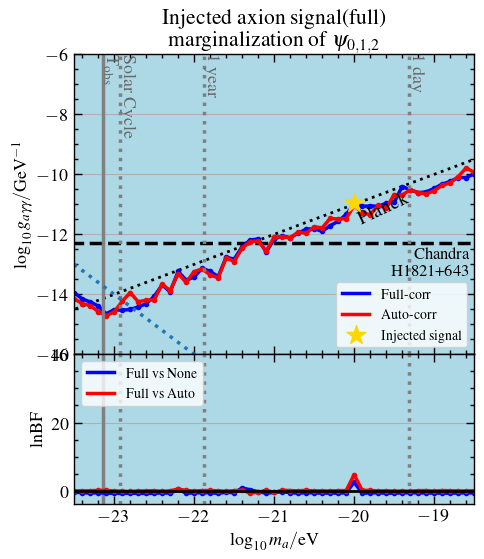

In [19]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-2.403, -2.664, -2.833, -3.129, -3.369, -3.342, -3.091, -2.896,
       -3.3  , -3.354, -3.438, -3.019, -3.328, -2.866, -3.259, -2.997,
       -3.01 , -3.308, -3.504, -2.944, -3.162, -2.813, -2.698, -2.778,
       -3.212, -2.85 , -2.93 , -3.074, -2.979, -3.12 , -3.003, -3.14 ,
       -2.922, -3.05 , -3.128, -2.792, -3.138, -3.3  , -3.089, -3.283,
       -2.929, -3.048, -2.974, -3.162, -3.313, -3.301, -3.226, -3.238,
       -3.134, -2.943, -3.189])


ul_full = np.array([-2.195, -2.508, -2.709, -2.945, -3.304, -3.269, -3.386, -3.459,
       -3.48 , -3.466, -3.327, -3.039, -3.374, -2.79 , -3.187, -3.178,
       -2.983, -3.189, -3.467, -2.916, -3.083, -2.769, -2.645, -2.71 ,
       -3.248, -2.916, -2.907, -3.07 , -3.014, -2.984, -3.066, -3.257,
       -3.166, -3.123, -2.991, -2.755, -2.923, -3.01 , -3.119, -3.12 ,
       -3.186, -2.762, -2.969, -3.167, -3.241, -3.227, -3.183, -3.194,
       -3.163, -3.265, -3.238])



axes[0].scatter(-20.0,l10S_to_l10ga(-2.7,-20.0),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 


lbf_af = np.array([-2.201e-02, -3.539e-02, -6.101e-03,  8.333e-02,  8.626e-02,
       -5.097e-02, -1.413e-01, -2.175e-01, -7.474e-02, -6.908e-02,
        1.640e-02, -1.717e-01, -2.519e-02,  4.926e-01,  7.536e-02,
       -8.831e-02,  3.332e-02,  8.550e-02, -4.219e-02, -1.561e-01,
        1.830e-02,  1.150e-01, -6.856e-01, -4.561e-01,  1.607e-01,
       -4.933e-01,  1.448e-01,  3.338e-02, -4.909e-02,  1.206e-01,
       -6.969e-02, -4.133e-02, -8.518e-02,  1.907e-02,  3.514e-02,
        4.732e+00,  8.880e-02,  1.025e-01, -7.835e-02,  5.135e-03,
       -1.524e-01, -6.182e-02, -1.412e-01,  3.701e-03,  4.964e-02,
       -1.379e-01,  4.670e-02, -5.038e-03, -6.590e-02, -6.406e-02,
       -6.192e-03])

lbf_nf = np.array([-0.504, -0.543, -0.724, -0.564, -0.767, -0.736, -0.803, -0.753,
       -0.772, -0.804, -0.78 , -0.623, -0.722,  0.377, -0.705, -0.672,
       -0.548, -0.598, -0.762, -0.45 , -0.604,  0.806,  0.276, -0.315,
       -0.721, -0.521, -0.33 , -0.555, -0.738, -0.578, -0.645, -0.725,
       -0.681, -0.72 , -0.601,  2.495, -0.726, -0.67 , -0.592, -0.743,
       -0.716, -0.644, -0.59 , -0.63 , -0.67 , -0.696, -0.724, -0.726,
       -0.668, -0.612, -0.664])








axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# -20.0 | -2.65 | seed:60

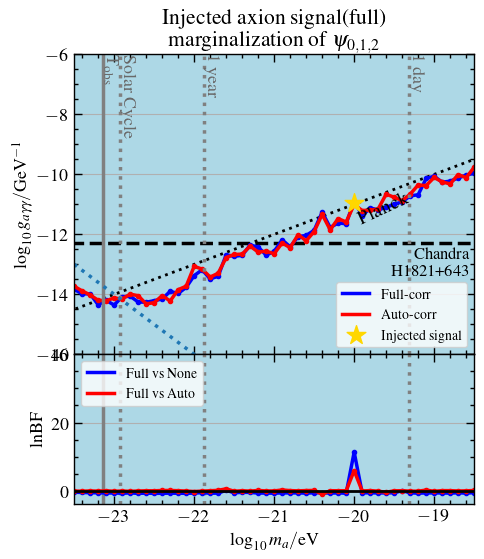

In [20]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
lbf_nf = None; lbf_af = None; ul_auto= None; ul_full=None;
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(0,51)*0.1 -23.5


ul_auto = np.array([-1.987, -2.242, -2.475, -2.755, -2.866, -2.878, -3.011, -2.949,
       -3.102, -3.473, -3.534, -3.398, -3.679, -3.4  , -3.385, -2.823,
       -3.015, -3.381, -3.353, -2.93 , -2.927, -3.015, -2.849, -3.147,
       -3.218, -3.402, -3.146, -3.401, -3.066, -3.372, -3.162, -2.692,
       -3.302, -3.031, -3.245, -2.759, -3.063, -3.148, -3.212, -2.815,
       -3.021, -3.23 , -3.117, -2.912, -3.03 , -2.859, -3.109, -3.275,
       -3.065, -3.265, -3.022])


ul_full = np.array([-2.091, -2.339, -2.441, -2.904, -2.859, -3.112, -2.936, -3.018,
       -3.31 , -3.42 , -3.467, -3.512, -3.356, -3.527, -3.423, -3.133,
       -3.036, -3.444, -3.45 , -2.837, -2.988, -3.056, -2.812, -2.98 ,
       -3.349, -3.325, -3.044, -3.37 , -3.131, -3.193, -3.122, -2.616,
       -3.229, -3.179, -3.302, -2.631, -3.243, -3.074, -3.244, -3.254,
       -3.254, -3.274, -3.176, -3.236, -2.794, -2.819, -3.119, -3.183,
       -3.177, -3.181, -3.216])



axes[0].scatter(-20.0,l10S_to_l10ga(-2.7,-20.0),s=200,marker="*",color="gold",zorder=4,alpha=1,label="Injected signal")
axes[0].set_facecolor('lightblue')
make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].set_title("Injected axion signal(full)\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
 


lbf_af = np.array([-9.949e-02, -1.441e-01, -6.178e-02, -1.163e-01, -1.319e-02,
       -1.636e-01, -8.316e-02, -1.811e-01, -7.967e-02, -1.223e-02,
       -2.573e-02,  6.815e-02,  8.113e-02,  4.129e-03, -9.439e-02,
       -2.340e-01, -1.059e-01, -1.368e-02,  1.081e-01,  5.582e-01,
       -1.602e-01, -2.736e-03, -1.194e-01,  8.297e-02, -7.209e-02,
       -6.025e-02,  2.234e-01,  3.260e-02, -4.469e-02,  4.451e-02,
        8.571e-02, -1.026e+00, -1.338e-03, -1.500e-02, -7.229e-03,
        5.884e+00, -8.690e-02,  4.191e-02, -1.359e-01, -4.521e-01,
       -2.722e-02, -4.963e-03, -1.164e-01, -1.488e-01,  1.911e-01,
       -1.743e-01,  2.553e-02,  1.858e-02, -7.696e-02, -3.338e-02,
        6.265e-02])


lbf_nf = np.array([-0.441, -0.519, -0.596, -0.616, -0.669, -0.683, -0.754, -0.642,
       -0.785, -0.709, -0.785, -0.754, -0.724, -0.743, -0.767, -0.698,
       -0.567, -0.742, -0.708,  0.13 , -0.623, -0.475, -0.503, -0.692,
       -0.7  , -0.739, -0.634, -0.665, -0.642, -0.72 , -0.606, -0.605,
       -0.716, -0.642, -0.747,    np.log(0.5036)+12, -0.621, -0.625, -0.657, -0.646,
       -0.614,  0.009, -0.625, -0.725, -0.656, -0.66 , -0.657, -0.723,
       -0.599, -0.729, -0.545])








axes[1].set_facecolor('lightblue')
make_bf_plot(axes[1],l10ma,lbf_af,lbf_nf)



# Single pulsar upper limit

In [21]:
# import json
# with open("Fig_1_data.json",'w') as f:
#     json.dump(all_data,f,indent=2)

In [22]:
# All_Results = {}
# PSR_NAME_LIST =  ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
# for psrn in PSR_NAME_LIST:
#     All_Results.update({psrn:{}})
    

In [23]:
import json
with open("Fig_1_data.json",'r') as f:
    all_data = json.load(f)

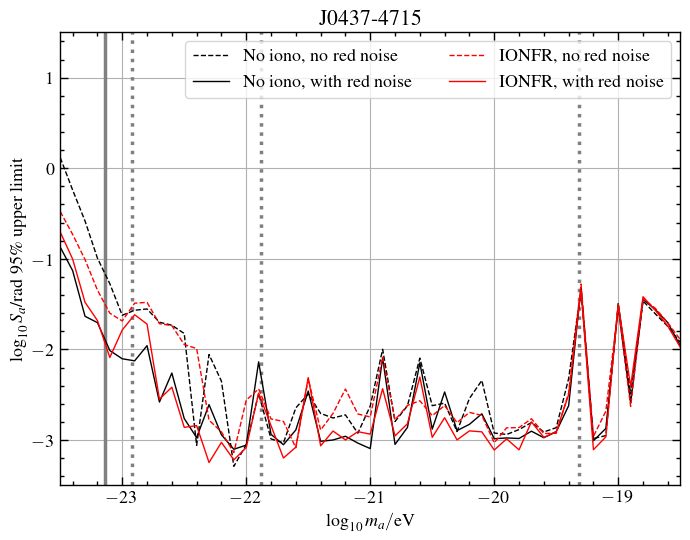

In [24]:
l10ma = np.arange(5,56)*0.1 -24
PSRNS=['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
for psrn in PSRNS:
    fig,ax = plt.subplots(figsize=(8,6))
    ax.grid()
    ax.set_xlim(-23.5,-18.5)
    ymin = -3.5
    ymax = 1.5
    plot_timescales(ax,ymin,ymax,annotate=False)
    plt.ylim(ymin,ymax)
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_NORED"] , 'k--' , label="No iono, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["NOIONO_RED"] ,'k-', label="No iono, with red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_NORED"] ,'r--', label="IONFR, no red noise" , lw=1 )
    except:
        pass
    try:
        ax.plot( l10ma , all_data[psrn]["IONFR_RED"] ,'r-', label="IONFR, with red noise" , lw=1 )
    except:
        pass
    plt.title(psrn)
    ax.legend(ncol=2)



    plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    plt.ylabel(r"$\log_{10}S_a$/rad 95\% upper limit")

    plt.savefig("spl_"+psrn+".jpg",bbox_inches='tight')
    if psrn !="J0437-4715":
        plt.close()

# Other

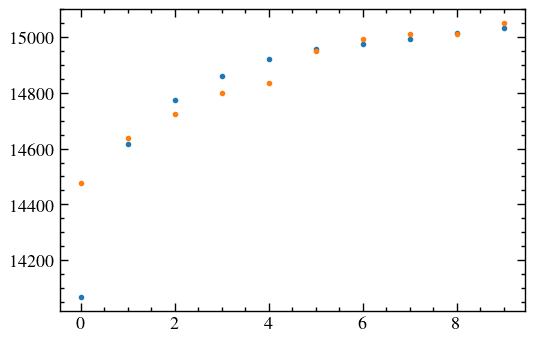

In [15]:
plt.plot([14066.1,14618.1,14775.0,14861.1,14921.8,14957.4,14976.0,14993.0,15015.5,15033.7,],'.')
plt.plot([14476.5,14639.2,14724.5,14801.6,14835.8,14952.1,14993.6,15010.2,15013.1,15052.0,],'.')